In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Indexing, slicing, reshaping

In [3]:
import numpy as np
a = np.arange(1, 13)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

indexing

In [4]:
b = np.array([10, 20, 30, 40])
b[0]

np.int64(10)

In [5]:
b[-2]

np.int64(30)

1.2. 2D Array Indexing

Use [row, column]

In [6]:
c = np.array([
    [1,2,3],
    [4,5,6]
    ])
c

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
c[0, 2]

np.int64(3)

In [8]:
c[1, 2]

np.int64(6)

1.3. Fancy Indexing
Index using lists/arrays.

In [9]:
b

array([10, 20, 30, 40])

In [10]:
b[[0, 2]]

array([10, 30])

1.4. Boolean Indexing

Filter using conditions.

In [11]:
a = np.array([10,20,30,40])

a[a > 25]

array([30, 40])

✅ 2. NumPy Slicing — Selecting Ranges

Format: start : stop : step

In [12]:
slicing = np.array([10, 20, 30, 40, 50])
slicing[1 : 4]

array([20, 30, 40])

In [13]:
slicing[:3]

array([10, 20, 30])

In [14]:
slicing[:]

array([10, 20, 30, 40, 50])

In [15]:
slicing[::2]

array([10, 30, 50])

2.2. 2D Slicing

Syntax: arr[row_start:row_end , col_start:col_end]

In [16]:
b = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b[0:2, 1:]     
# array([[2, 3],
#        [5, 6]])



array([[2, 3],
       [5, 6]])

In [17]:
b[:, ::2]   # take all rows, every 2nd column → [[1,3],[4,6],[7,9]]


array([[1, 3],
       [4, 6],
       [7, 9]])

✅ 3. Reshaping Arrays

Reshaping changes the array's shape without changing data.

3.1. Using reshape()

In [18]:
a = np.array([1, 2, 3, 4, 5, 6])
a.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

3.2. Use -1 when one dimension is unknown

NumPy will calculate it automatically.

In [19]:
a.reshape(3,-1)

array([[1, 2],
       [3, 4],
       [5, 6]])

3.3. ravel() and flatten()

Convert to 1D.

In [20]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [21]:
a.flatten()

array([1, 2, 3, 4, 5, 6])

3.4. transpose()

Swap axes.

In [22]:
b = np.array([[1,2,3],[4,5,6]])

In [23]:
b.T

array([[1, 4],
       [2, 5],
       [3, 6]])

3.5. reshape vs resize

reshape → returns new array, original unchanged.

resize → modifies the original array.

Reshaping (3d array)

In [24]:
d3 = np.arange(24)
d3.reshape((2,3,4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

Interpolation Techniques

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [26]:
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
y = np.sin(x)
y[[2,5,7]] = np.nan

In [31]:
y

array([ 0.        ,  0.84147098,         nan,  0.14112001, -0.7568025 ,
               nan, -0.2794155 ,         nan,  0.98935825,  0.41211849])

In [34]:
data = pd.DataFrame(
    {'X': x, 'Y': y})
print("Original Data with Missing Values : ")
data

Original Data with Missing Values : 


,X,Y
0,0,0.000000
1,1,0.841471
2,2,NaN
3,3,0.141120
4,4,-0.756802
5,5,NaN
6,6,-0.279415
7,7,NaN
8,8,0.989358
9,9,0.412118


In [38]:
# Linear Interpolation

data['Linear'] = data['Y'].interpolate(method='linear')
data

,X,Y,Linear
0,0,0.000000,0.000000
1,1,0.841471,0.841471
2,2,NaN,0.491295
3,3,0.141120,0.141120
4,4,-0.756802,-0.756802
5,5,NaN,-0.518109
6,6,-0.279415,-0.279415
7,7,NaN,0.354971
8,8,0.989358,0.989358
9,9,0.412118,0.412118


In [40]:
data['Polynomial'] = data['Y'].interpolate(method='polynomial', order=2)
data

,X,Y,Linear,Polynomial
0,0,0.000000,0.000000,0.000000
1,1,0.841471,0.841471,0.841471
2,2,NaN,0.491295,0.810343
3,3,0.141120,0.141120,0.141120
4,4,-0.756802,-0.756802,-0.756802
5,5,NaN,-0.518109,-0.834084
6,6,-0.279415,-0.279415,-0.279415
7,7,NaN,0.354971,0.543623
8,8,0.989358,0.989358,0.989358
9,9,0.412118,0.412118,0.412118


In [44]:
data['Spline'] = data['Y'].interpolate(method='spline', order=3)
data

,X,Y,Linear,Polynomial,Spline
0,0,0.000000,0.000000,0.000000,0.000000
1,1,0.841471,0.841471,0.841471,0.841471
2,2,NaN,0.491295,0.810343,0.092972
3,3,0.141120,0.141120,0.141120,0.141120
4,4,-0.756802,-0.756802,-0.756802,-0.756802
5,5,NaN,-0.518109,-0.834084,-0.216721
6,6,-0.279415,-0.279415,-0.279415,-0.279415
7,7,NaN,0.354971,0.543623,-0.006340
8,8,0.989358,0.989358,0.989358,0.989358
9,9,0.412118,0.412118,0.412118,0.412118


In [46]:
print("After Interpolation")
data

After Interpolation


,X,Y,Linear,Polynomial,Spline
0,0,0.000000,0.000000,0.000000,0.000000
1,1,0.841471,0.841471,0.841471,0.841471
2,2,NaN,0.491295,0.810343,0.092972
3,3,0.141120,0.141120,0.141120,0.141120
4,4,-0.756802,-0.756802,-0.756802,-0.756802
5,5,NaN,-0.518109,-0.834084,-0.216721
6,6,-0.279415,-0.279415,-0.279415,-0.279415
7,7,NaN,0.354971,0.543623,-0.006340
8,8,0.989358,0.989358,0.989358,0.989358
9,9,0.412118,0.412118,0.412118,0.412118


-------------------------Visualization------------------------------

Text(0, 0.5, 'Y')

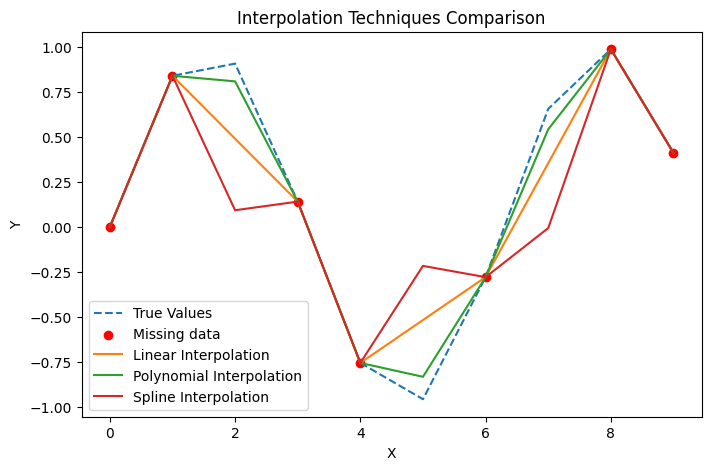

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(x, np.sin(x) , label="True Values", linestyle='--')
plt.scatter(x, y, color='red',label='Missing data')
plt.plot(x, data['Linear'], label='Linear Interpolation')
plt.plot(x, data['Polynomial'], label='Polynomial Interpolation')
plt.plot(x, data['Spline'], label='Spline Interpolation')
plt.legend()
plt.title("Interpolation Techniques Comparison")
plt.xlabel("X")
plt.ylabel("Y")

types of visualization

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 11)
y= x ** 2
z = np.sin(x)

Line Plot

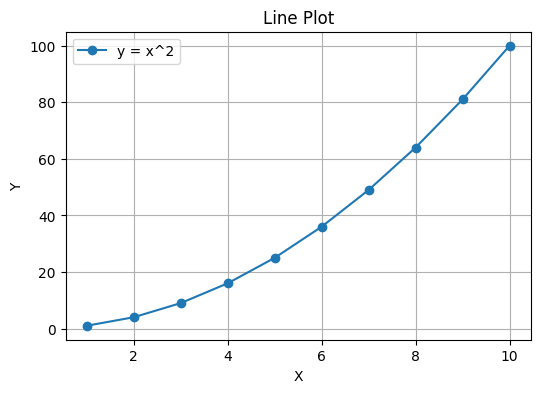

In [3]:
plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o', linestyle='-', label='y = x^2')
plt.title("Line Plot")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Scatter plot

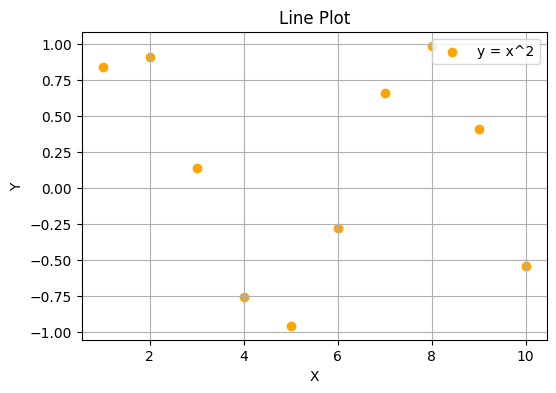

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(x, z, marker='o', color='orange', linestyle='-', label='y = x^2')
plt.title("Line Plot")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Histogram

In [11]:
from numpy import random

/tmp/ipykernel_2354/1784128183.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


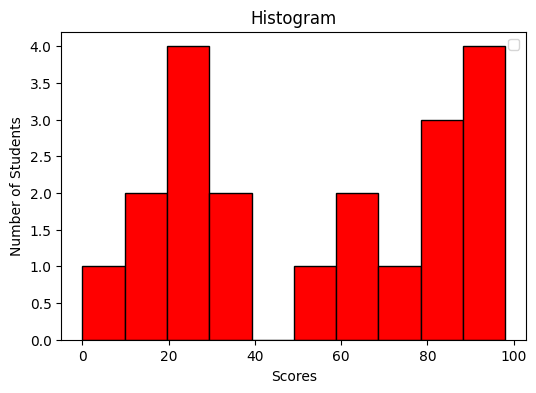

In [24]:
data = random.randint(100, size=20)
plt.figure(figsize=(6, 4))
plt.hist(data, bins=10, color='red', edgecolor='black')
plt.title("Histogram")
plt.xlabel("Scores")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

Bar plot

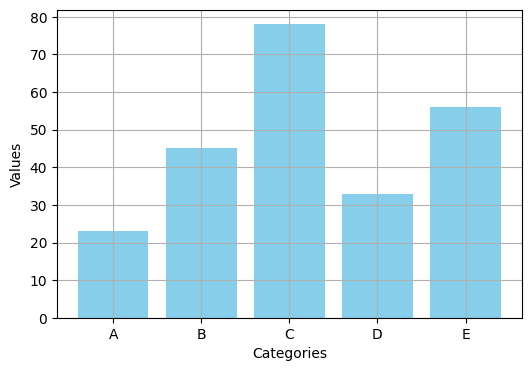

In [30]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 78, 33, 56]
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color='skyblue')
plt.grid(True)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

3D Visualizations using Matplotlib

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
plt.style.use('seaborn-v0_8-darkgrid')

In [40]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))


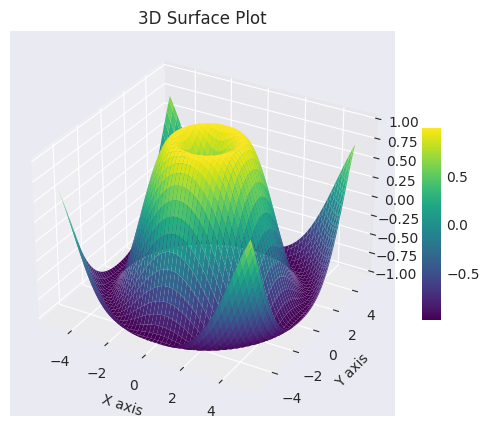

In [49]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('3D Surface Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

3D Wireframe Plot

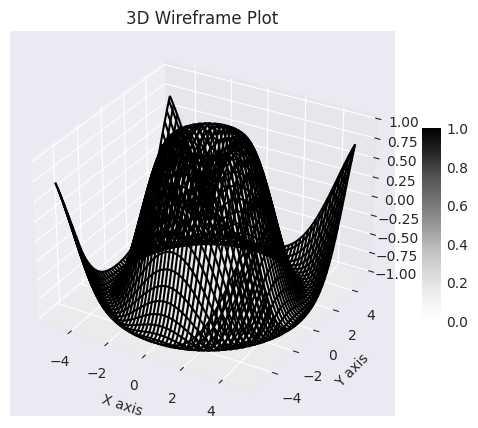

In [53]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('3D Wireframe Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

3D Contour Plot

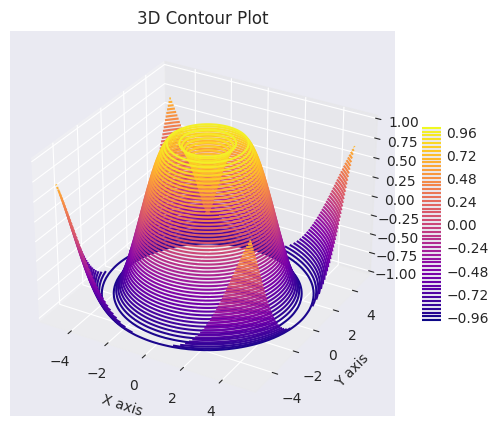

In [56]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.contour3D(X, Y, Z, 50, cmap='plasma')
ax.set_title('3D Contour Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

3D Scatter Plot

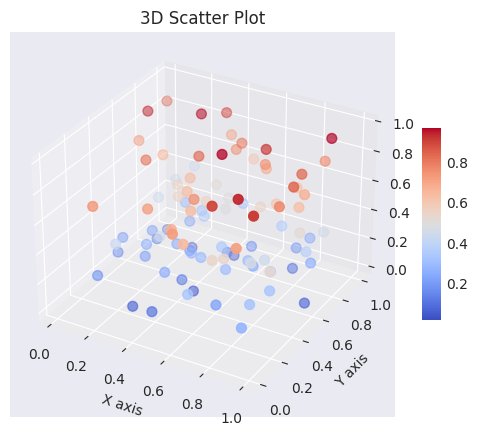

In [61]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
x=np.random.rand(100)
y=np.random.rand(100)
z=np.random.rand(100)
surf = ax.scatter(x, y, z, c=z, cmap='coolwarm', s=50)
ax.set_title('3D Scatter Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

3D Line Plot

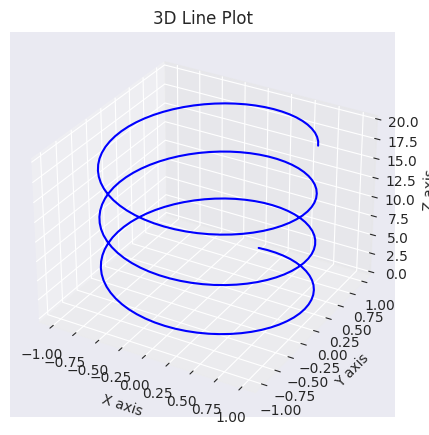

In [65]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(0, 20, 200)
x=np.sin(t)
y = np.cos(t)
z = t
surf = ax.plot3D(x, y, z, 'blue')
ax.set_title('3D Line Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

3D Bar Plot

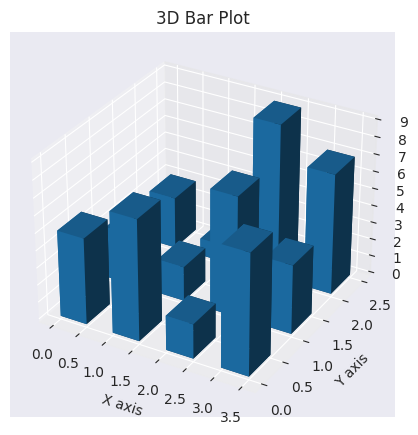

In [67]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
_x = np.arange(4)
_y = np.arange(3)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
z = np.zeros_like(x)
dx=dy=0.5
dz=np.random.randint(1, 10, size=len(z))
ax.bar3d(x, y, z, dx, dy, dz, shade=True, cmap='cool')
ax.set_title('3D Bar Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Seaborn Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1) pair plot

Text(0.5, 1.02, 'Pair Plot - Iris Dataset')

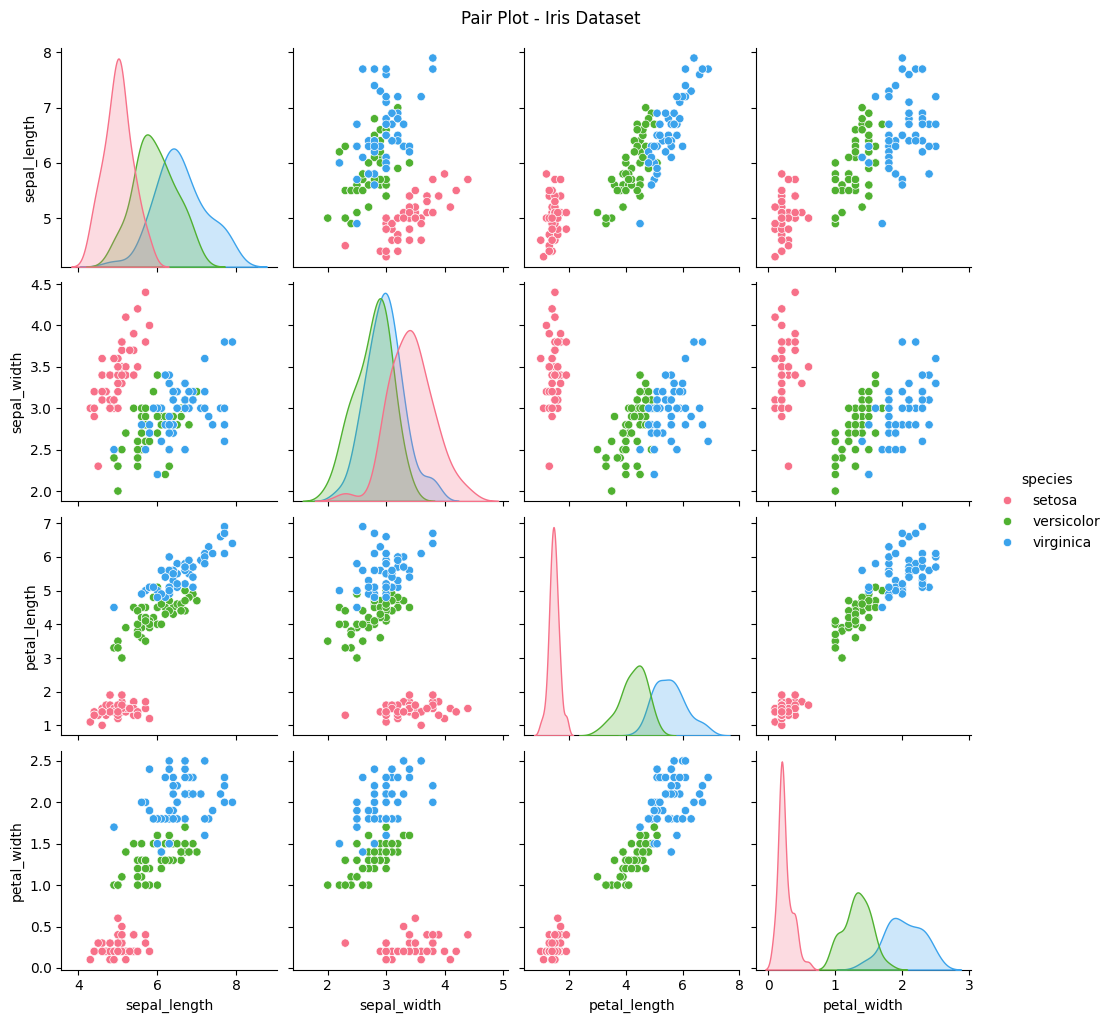

In [3]:
sns.pairplot(df, hue='species', palette='husl')
plt.suptitle("Pair Plot - Iris Dataset", y=1.02)

Contour Plot

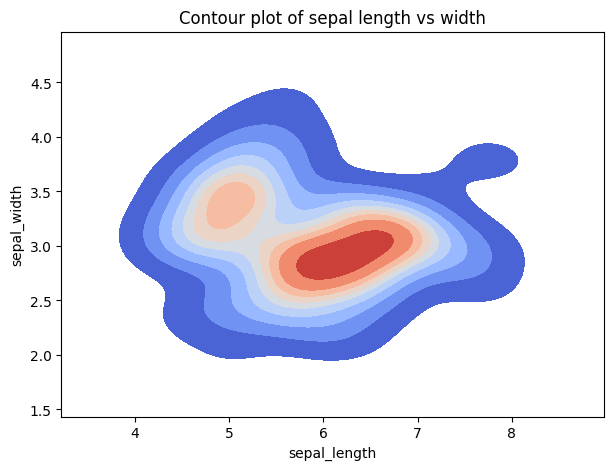

In [5]:
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df,
    x='sepal_length',
    y='sepal_width',
    fill=True,
    cmap='coolwarm',
    levels=10,
    thresh=0.05
)

plt.title("Contour plot of sepal length vs width")
plt.show()

violin plot

/tmp/ipykernel_2345/2115875890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="species", y="petal_length", palette='Set2')


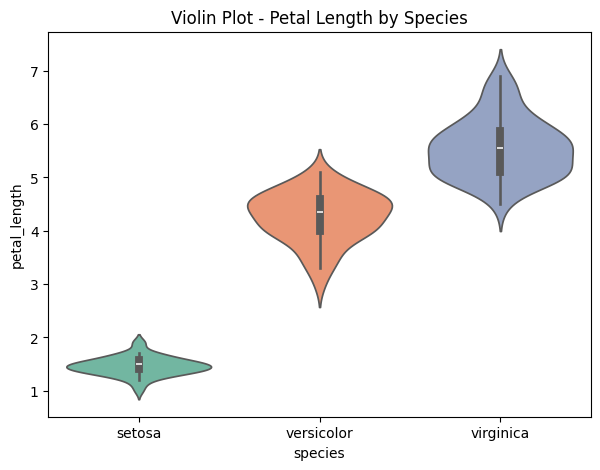

In [7]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x="species", y="petal_length", palette='Set2')
plt.title("Violin Plot - Petal Length by Species")
plt.show()

Swarm Plot

/tmp/ipykernel_2345/4090045796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="species", y="petal_width", palette='Set1')
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


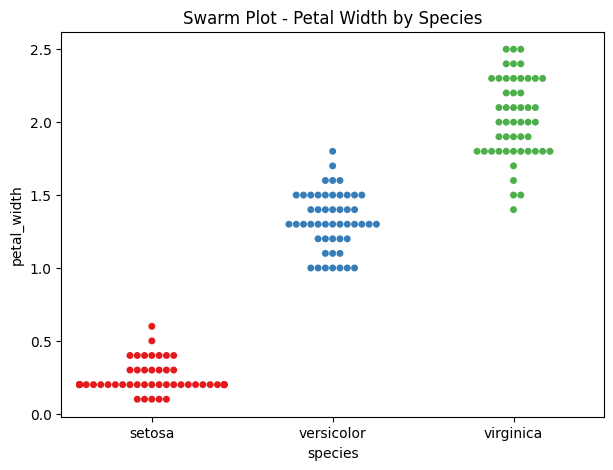

In [10]:
plt.figure(figsize=(7, 5))
sns.swarmplot(data=df, x="species", y="petal_width", palette='Set1')
plt.title("Swarm Plot - Petal Width by Species")
plt.show()

Box Plot

/tmp/ipykernel_2345/1005712702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="sepal_length", palette='Pastel1')


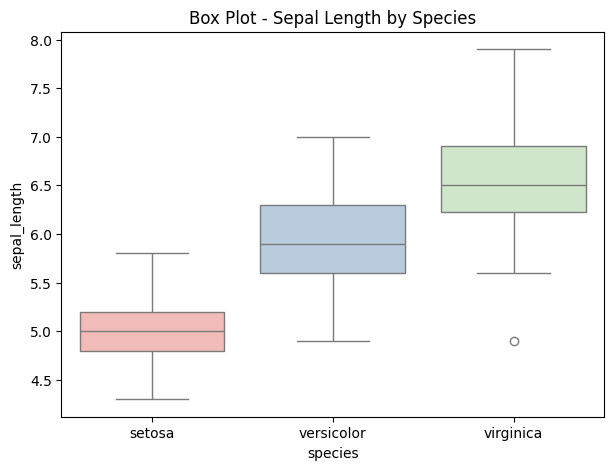

In [11]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="species", y="sepal_length", palette='Pastel1')
plt.title("Box Plot - Sepal Length by Species")
plt.show()